In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pqr_agrs_100_30k = pd.read_csv('../../lp_csv/mLP3_20.csv', header = 2)

In [3]:
pqr_agrs_100_30k

,wall_time,step,run/total_reward,run/length,lp/lp_total_reward,lp/lp_length,lp/count_used_lp,loss/value_loss,loss/policy_loss,loss/agent_loss,loss/entropy,total_loss
0,1.606564e+09,0,1.0,61.0,0.0,0.0,0.0,0.152438,1.708914,1.861352,1.786367,1.861352
1,1.606564e+09,61,0.0,100.0,0.0,0.0,0.0,0.129817,1.564239,1.694056,1.549234,1.694056
2,1.606564e+09,161,1.0,53.0,0.0,0.0,0.0,0.110945,1.510500,1.621445,1.532096,1.621445
3,1.606564e+09,214,1.0,67.0,0.0,0.0,0.0,0.087361,1.523278,1.610639,1.485613,1.610639
4,1.606564e+09,281,0.0,100.0,0.0,0.0,0.0,0.075496,1.543279,1.618775,1.519336,1.618775
...,...,...,...,...,...,...,...,...,...,...,...,...
34996,1.606557e+09,59807,1.0,20.0,0.0,0.0,0.0,0.014076,0.668721,0.682797,0.710573,0.682797
34997,1.606557e+09,59827,1.0,29.0,0.0,0.0,0.0,0.012760,0.825142,0.837902,0.682613,0.837902
34998,1.606557e+09,59856,1.0,47.0,0.0,0.0,0.0,0.017625,0.748193,0.765818,0.670348,0.765818
34999,1.606557e+09,59903,1.0,38.0,0.0,0.0,0.0,0.009275,0.685224,0.694499,0.696274,0.694499


In [4]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.280000,84.280000,0.000000,0.000000
1,27.0,0.139860,92.147860,0.039200,123.559200
2,33.0,0.093147,94.770477,0.026107,82.290400
3,43.0,0.195165,89.687644,0.058853,157.733888
4,48.0,0.356777,82.320736,0.174036,388.186545
...,...,...,...,...,...
26175,59988.0,0.998954,34.293304,0.000674,87.447962
26176,59992.0,0.998956,34.284726,0.000672,87.310032
26177,59996.0,0.998958,34.276165,0.000671,87.172230
26178,59998.0,0.998960,34.309579,0.000670,87.556316


In [5]:
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/mNoLP3_20_1.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs


,step,reward,length,reward_se,length_se
0,0.0,0.320000,82.440000,0.000000,0.000000
1,33.0,0.660340,62.199780,0.231200,817.696800
2,41.0,0.439786,74.825062,0.260979,885.201222
3,45.0,0.329510,81.137690,0.222262,748.305083
4,46.0,0.464145,73.680412,0.256711,837.336616
...,...,...,...,...,...
26279,59990.0,0.998987,34.170974,0.000485,82.213256
26280,59992.0,0.998989,34.172631,0.000484,82.050366
26281,59994.0,0.998991,34.152306,0.000483,82.092980
26282,59996.0,0.998993,34.186966,0.000482,82.529642


In [6]:
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/NoLP3_20_noDFA.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_lp_no_dfa = df_av_at_step
df_no_lp_no_dfa

,step,reward,length,reward_se,length_se
0,0.0,0.200000,90.120000,0.000000,0.000000
1,42.0,0.099900,95.064940,0.020000,48.807200
2,48.0,0.066533,96.713251,0.013320,32.505584
3,54.0,0.175225,92.773146,0.055938,83.498730
4,55.0,0.340841,82.979459,0.178371,539.753093
...,...,...,...,...,...
19520,59989.0,0.971232,43.727895,0.023932,197.995617
19521,59993.0,0.971289,43.744422,0.023886,197.736603
19522,59994.0,0.971346,43.738939,0.023840,197.356559
19523,59995.0,0.971404,43.727473,0.023794,197.027979


In [7]:
# 12 runs of LP3_20_1LP_DFA
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/mLP3_20_1LP_DFA1.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_1lp_dfa = df_av_at_step
df_1lp_dfa



,step,reward,length,reward_se,length_se
0,0.0,0.320000,82.480000,0.000000,0.000000
1,26.0,0.660340,67.725260,0.231200,434.535200
2,36.0,0.439786,78.505030,0.260979,564.617050
3,41.0,0.580260,72.861883,0.252429,502.907165
4,43.0,0.463743,78.311238,0.256675,524.540457
...,...,...,...,...,...
26227,59986.0,0.997284,34.014592,0.002625,104.269234
26228,59987.0,0.997290,33.990587,0.002620,104.349029
26229,59988.0,0.997295,33.981282,0.002615,104.183832
26230,59990.0,0.997301,33.967333,0.002610,104.072955


In [8]:
# 1 runs of LP3_20_allLP1
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/mLP_20_allLP_onlyone.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_all_lp_noDFA = df_av_at_step
df_all_lp_noDFA

,step,reward,length,reward_se,length_se
0,0.0,0.000000,100.000000,0.000000,0.000000
1,100.0,0.500500,75.976000,0.500000,1152.000000
2,152.0,0.667333,80.326019,0.333000,632.022048
3,241.0,0.499999,85.259279,0.333334,517.886459
4,341.0,0.600400,76.171180,0.299901,798.936096
...,...,...,...,...,...
372,28812.0,0.527301,74.730818,0.249956,711.201708
373,28879.0,0.529094,74.572511,0.249852,715.098557
374,28912.0,0.530877,74.456742,0.249744,715.921648
375,28956.0,0.532650,74.375636,0.249629,714.949175


In [9]:
# 1 runs of LP3_20_1LP_noDFA
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/m0110_ratioLP.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_perfectratio = df_av_at_step
df_perfectratio

,step,reward,length,reward_se,length_se
0,0.0,0.214286,92.285714,0.000000,0.000000
1,47.0,0.607536,91.141714,0.308673,2.612245
2,59.0,0.404619,94.100384,0.277339,27.487373
3,86.0,0.303160,95.579715,0.225718,27.025355
4,100.0,0.315304,93.674356,0.169853,38.310263
...,...,...,...,...,...
16549,59981.0,0.997205,31.190059,0.002474,125.631635
16550,59983.0,0.997211,31.167701,0.002469,125.630557
16551,59996.0,0.997216,31.166367,0.002464,125.380437
16552,59999.0,0.997222,31.205995,0.002459,125.915102


In [10]:
# 1 runs of LP3_20_1LP_noDFA
pqr_no_agrs_100_30k = pd.read_csv('../../runs/pool_cass/cass_pool_train/merge-csv.com__60184e7c4e9ce.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_third_decay = df_av_at_step
df_third_decay


,step,reward,length,reward_se,length_se
0,0.0,0.666667,66.833333,0.000000,0.000000
1,40.0,0.833500,53.903750,0.055556,333.680556
2,46.0,0.555111,69.299908,0.259556,875.669577
3,55.0,0.415917,76.997971,0.250055,819.290908
4,60.0,0.332400,81.616797,0.222055,719.989530
...,...,...,...,...,...
8486,59930.0,0.998997,31.742653,0.001003,117.524680
8487,59943.0,0.998999,31.766144,0.001001,117.565784
8488,59951.0,0.999001,31.730647,0.000999,117.960899
8489,59976.0,0.999003,31.703213,0.000997,118.101521


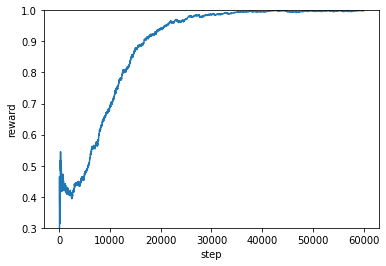

In [11]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

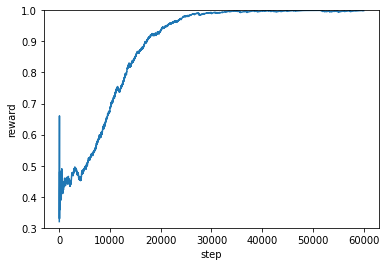

In [12]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

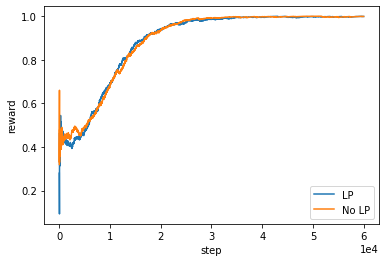

In [13]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

axs.legend(['LP','No LP'], loc=4)

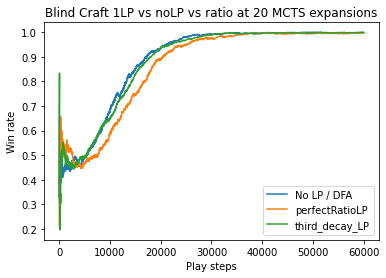

In [14]:
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')

sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99, )


sns.lineplot(x="step", y="reward", data=df_perfectratio,ax=axs, ci=99, )
sns.lineplot(x="step", y="reward", data=df_third_decay ,ax=axs, ci=99, )


#axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"],
#                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"],
#                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate')
plt.title('Blind Craft 1LP vs noLP vs ratio at 20 MCTS expansions')

axs.legend(['No LP / DFA', 'perfectRatioLP', 'third_decay_LP'])

NameError: name 'df_all_lp_dfa' is not defined

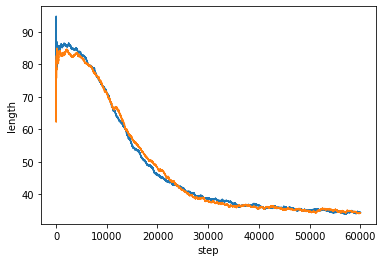

In [15]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
sns.lineplot(x="step", y="length", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_all_lp_dfa,ax=axs, ci=99)

sns.lineplot(x="step", y="length", data=df_1LP_noDFA,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_lp_no_dfa,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_all_lp_noDFA,ax=axs, ci=99)

axs.set(xlabel='Play steps', ylabel='Length per Episode')
plt.title('Blind Craft 3threads, 1/3 LP, 25runs * 60k steps at 20 MCTS expansions')

axs.legend(['1LP / DFA', 'No LP / DFA', 'ALL LP / DFA', '1LP / No DFA', 'No LP / No DFA', 'all LP / no DFA'], loc=1)

